# Music Popularity Prediction 

Music popularity prediction involves developing machine learning models to estimate the popularity of music tracks based on their audio features. Predicting the popularity of music can help music streaming platforms understand user preferences, optimize playlists and enhance recommendation systems to improve user engagement and satisfaction.

## Overview
Music popularity prediction means using regression techniques to forecast the popularity of songs based on various music features and metadata. Expected results include accurate predictions of a song’s future performance in terms of streams, downloads, and chart positions, which enable music producers, artists, and marketers to make informed decisions.

In [1]:
import pandas as pd

spotify_data = pd.read_csv("Spotify_data.csv")

print(spotify_data.head())

   Unnamed: 0                  Track Name  \
0           0                 Not Like Us   
1           1                     Houdini   
2           2  BAND4BAND (feat. Lil Baby)   
3           3          I Don't Wanna Wait   
4           4                       Pedro   

                                   Artists                  Album Name  \
0                           Kendrick Lamar                 Not Like Us   
1                                   Eminem                     Houdini   
2                    Central Cee, Lil Baby  BAND4BAND (feat. Lil Baby)   
3                David Guetta, OneRepublic          I Don't Wanna Wait   
4  Jaxomy, Agatino Romero, Raffaella Carrà                       Pedro   

                 Album ID                Track ID  Popularity Release Date  \
0  5JjnoGJyOxfSZUZtk2rRwZ  6AI3ezQ4o3HUoP6Dhudph3          96   2024-05-04   
1  6Xuu2z00jxRPZei4IJ9neK  2HYFX63wP3otVIvopRS99Z          94   2024-05-31   
2  4AzPr5SUpNF553eC1d3aRy  7iabz12vAuVQYyekFIWJxD 

The dataset has an unnamed column, drop it and move forward:

In [2]:
spotify_data.drop(columns=['Unnamed: 0'], inplace=True)

Now, let’s have a look at the column info before moving forward:

In [3]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        227 non-null    object 
 1   Artists           227 non-null    object 
 2   Album Name        227 non-null    object 
 3   Album ID          227 non-null    object 
 4   Track ID          227 non-null    object 
 5   Popularity        227 non-null    int64  
 6   Release Date      227 non-null    object 
 7   Duration (ms)     227 non-null    int64  
 8   Explicit          227 non-null    bool   
 9   External URLs     227 non-null    object 
 10  Danceability      227 non-null    float64
 11  Energy            227 non-null    float64
 12  Key               227 non-null    int64  
 13  Loudness          227 non-null    float64
 14  Mode              227 non-null    int64  
 15  Speechiness       227 non-null    float64
 16  Acousticness      227 non-null    float64
 1

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


Now, let’s get started with EDA. As popularity is the target variable, I’ll have a look at the relationship between all the music features with popularity:

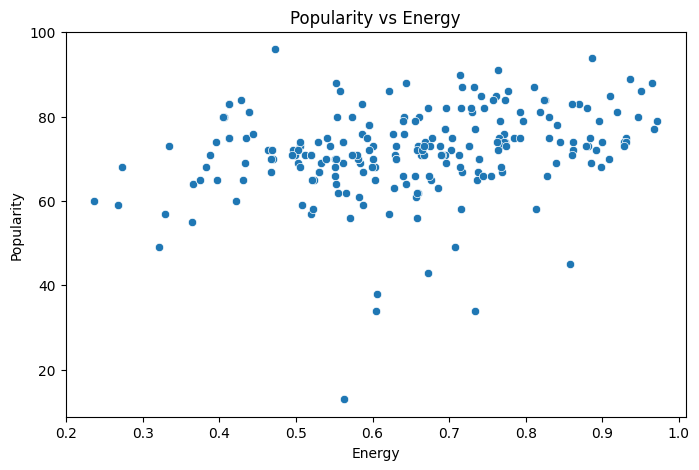

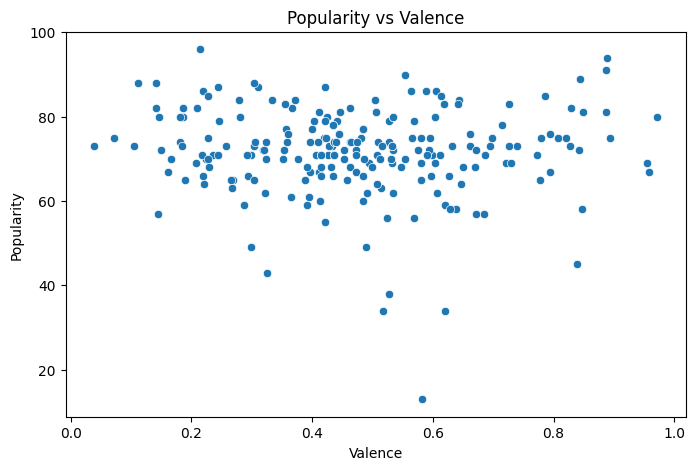

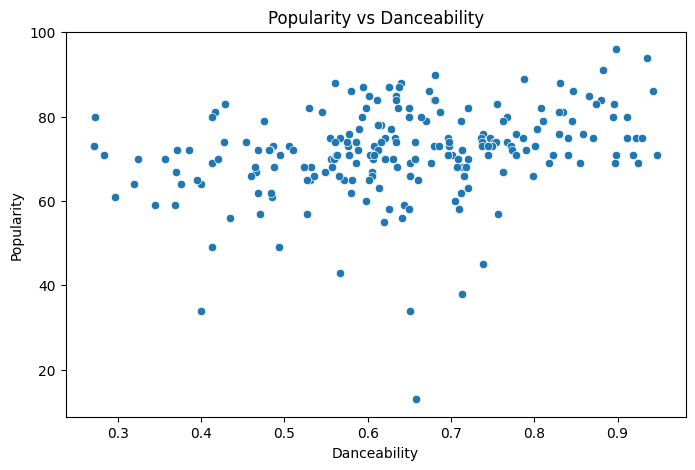

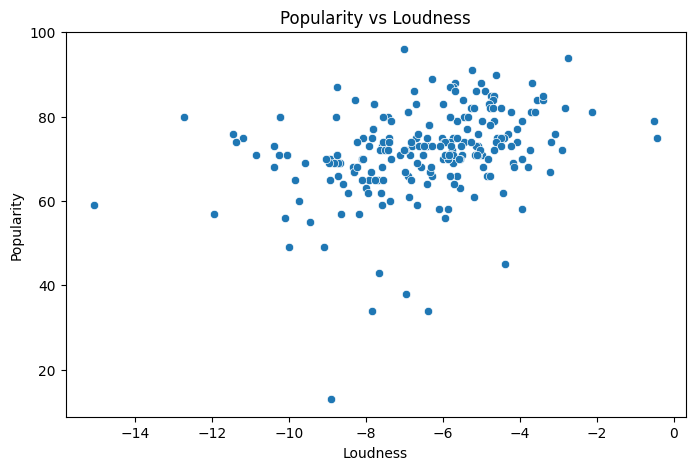

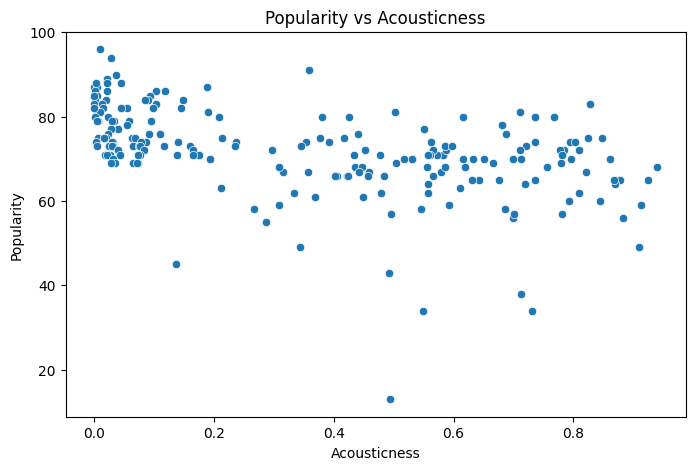

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=spotify_data, x=feature, y='Popularity')
    plt.title(f'Popularity vs {feature}')
    plt.show()

From these visualizations, we can observe that higher energy levels and danceability tend to correlate positively with higher popularity scores. Conversely, increased acousticness and lower loudness levels generally correspond with lower popularity, suggesting that more energetic and less acoustic tracks are favoured. Valence shows a weaker, less clear relationship with popularity, indicating that the emotional positivity of a track alone doesn’t strongly predict its popularity.

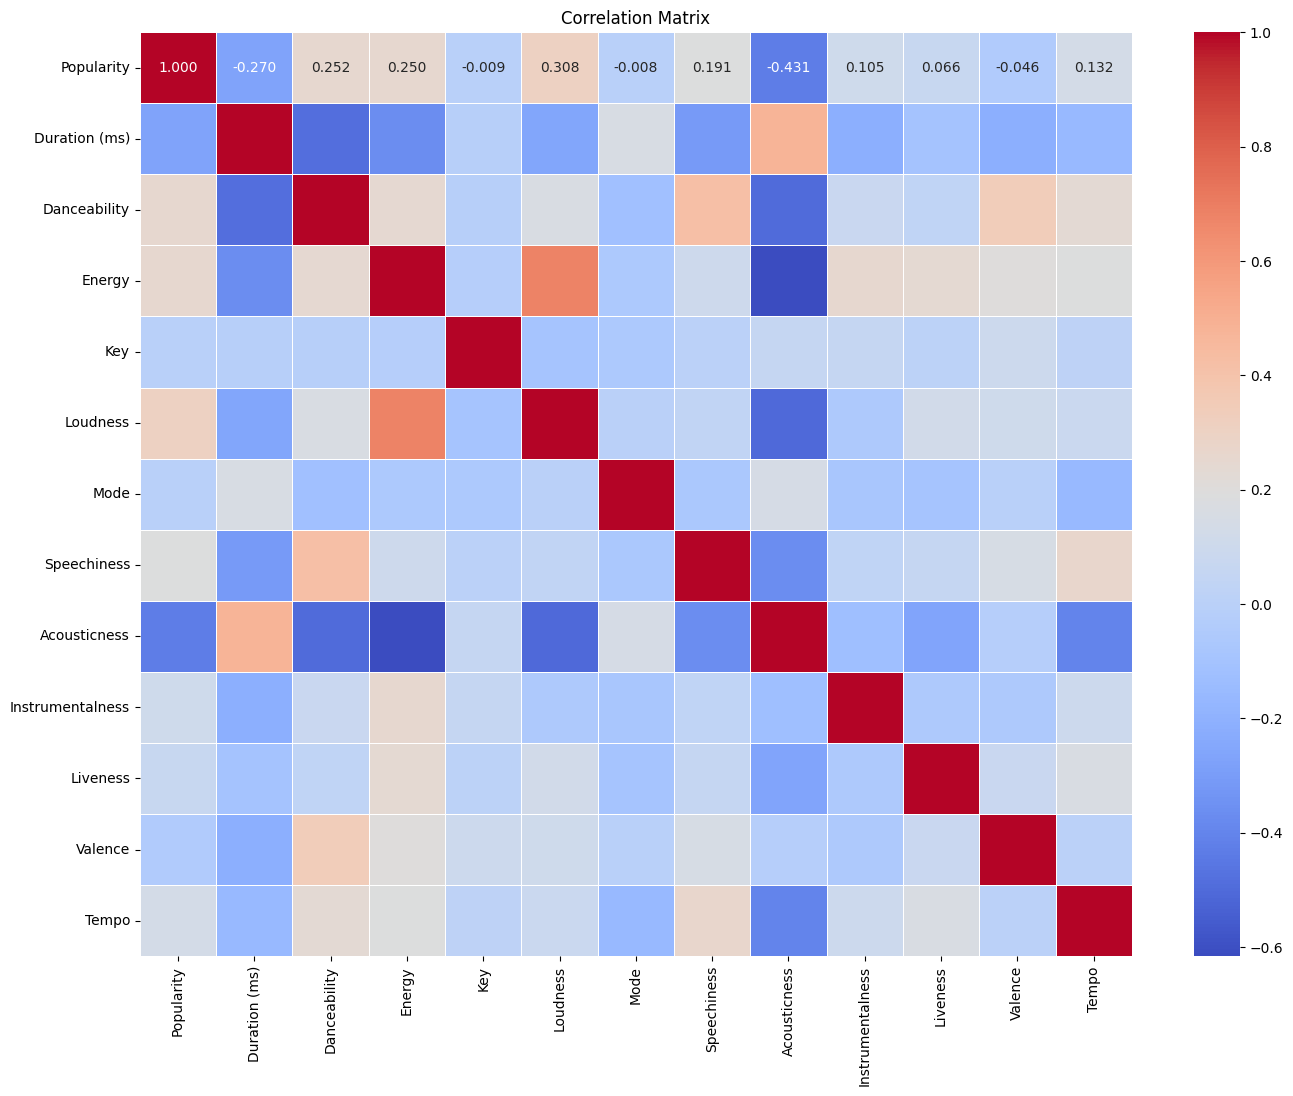

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming spotify_data is already loaded
numeric_columns = spotify_data.select_dtypes(include=['float64', 'int64', 'float32']).columns
numeric_data = spotify_data[numeric_columns]

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap with adjustments
plt.figure(figsize=(16, 12))  # Increase figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5, annot_kws={'size': 10})
plt.title('Correlation Matrix')
plt.show()



Now, let’s have a look at the distribution of all the music features:

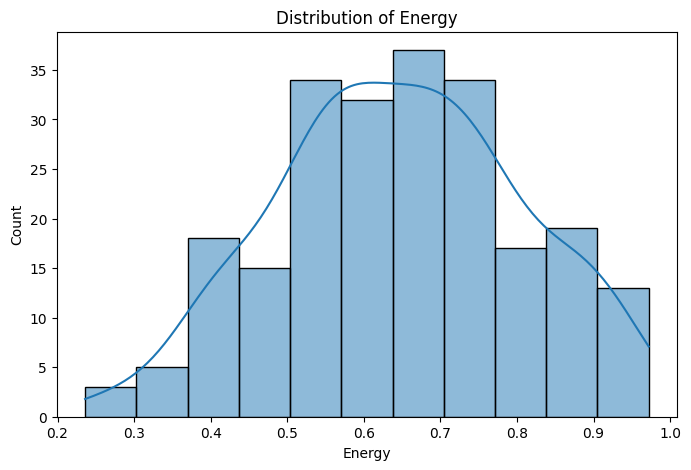

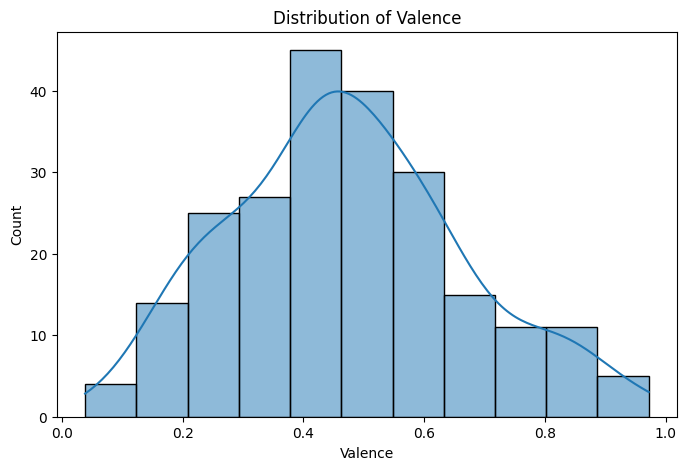

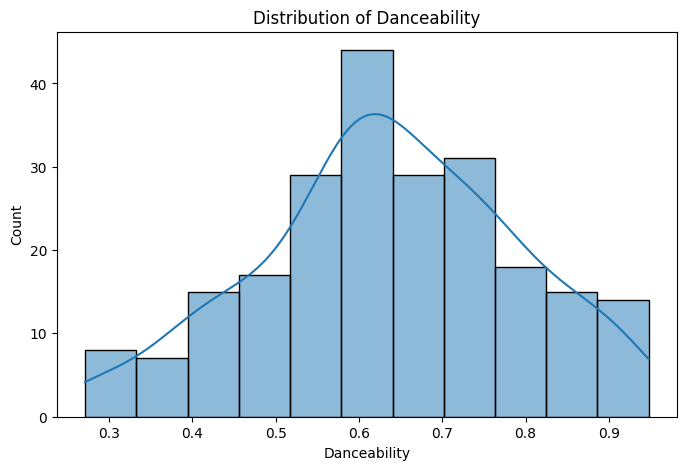

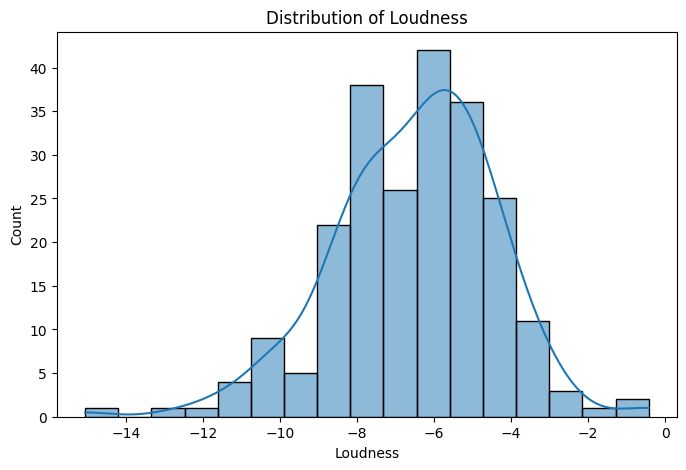

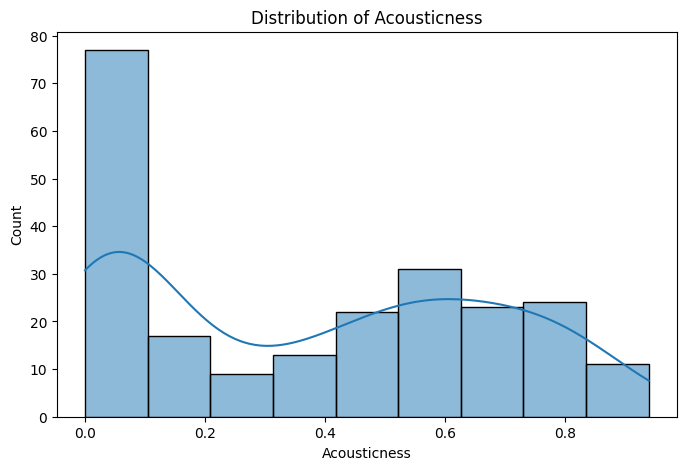

In [12]:
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(spotify_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Feature Selection and Model Training
Based on the correlation analysis and visualizations, the following features show a significant relationship with popularity and can be used to train a music popularity prediction model:

* Energy
* Valence
* Danceablity
* Loudness
* Acousticness
* Tempo
* Speechiness
* Liveness

These features capture various audio characteristics that influence the popularity of music tracks.



The next step is to train a Machine Learning model to predict the popularity of music using the features we have selected. So, let’s split and scale the data and then train the model using the random forest regression algorithm:

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# select the features and target variable
features = ['Energy', 'Valence', 'Danceability', 'Loudness', 'Acousticness', 'Tempo', 'Speechiness', 'Liveness']
X = spotify_data[features]
y = spotify_data['Popularity']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, refit=True, verbose=2, cv=5)

grid_search_rf.fit(X_train_scaled, y_train)

best_params_rf = grid_search_rf.best_params_

best_rf_model = grid_search_rf.best_estimator_

y_pred_best_rf = best_rf_model.predict(X_test_scaled)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; 

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 

Now, let’s have a look at the actual vs predicted results of the test data:

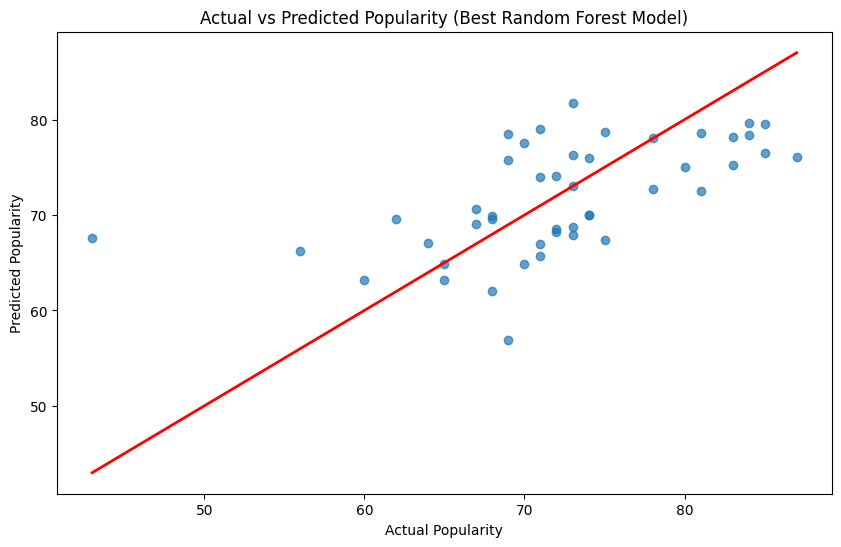

In [16]:
# make predictions
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity (Best Random Forest Model)')
plt.show()

The red line represents perfect predictions, where the predicted popularity would exactly match the actual popularity. Most of the points are clustered around this line, which indicates that the model is making reasonably accurate predictions. However, there are some deviations, particularly at lower popularity values, which suggest areas where the model’s predictions are less precise.